### 教師あり学習：分類1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [3]:
df = pd.DataFrame(data=x, columns=feature_names)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
np.unique(t)

array([0, 1, 2])

In [5]:
x.shape, t.shape

((150, 4), (150,))

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(random_state=0)

In [8]:
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
print('train score:', dtree.score(x_train, t_train))
print('test score:', dtree.score(x_test, t_test))

train score: 1.0
test score: 0.9777777777777777


In [10]:
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [12]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree)

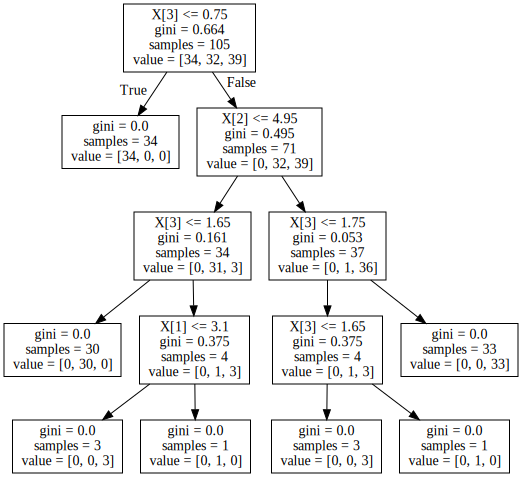

In [13]:
graph_tree = graphviz.Source(dot_data)
graph_tree

In [14]:
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

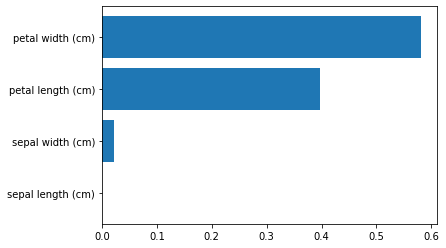

In [15]:
y = feature_names
width = feature_importance
plt.barh(y=y, width=width)

#### サポートベクトルマシン (SVM)

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()
svc.fit(x_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
print('train score:', svc.score(x_train, t_train))
print('test score:', svc.score(x_test, t_test))

train score: 0.9714285714285714
test score: 0.9777777777777777


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [22]:
round(x_train_std.mean())

0

In [23]:
round(x_train_std.std())

1

In [24]:
svc_std = SVC()
svc_std.fit(x_train_std, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
print('train score:', svc.score(x_train, t_train))
print('test score:', svc.score(x_test, t_test))

print('train score scaling:', svc_std.score(x_train_std, t_train))
print('test score scaling:', svc_std.score(x_test_std, t_test))

train score: 0.9714285714285714
test score: 0.9777777777777777
train score scaling: 0.9714285714285714
test score scaling: 0.9777777777777777


#### ロジスティック回帰

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('train score:', log_reg.score(x_train, t_train))
print('test score:', log_reg.score(x_test, t_test))

train score: 0.9809523809523809
test score: 0.9777777777777777


In [29]:
log_reg.coef_.shape

(3, 4)

In [30]:
log_reg.coef_

array([[-0.39765327,  0.8342231 , -2.28943702, -0.97842682],
       [ 0.5445833 , -0.29081813, -0.23264797, -0.65833762],
       [-0.14693003, -0.54340497,  2.52208499,  1.63676445]])

In [31]:
log_reg.intercept_

array([  8.99755733,   1.54386287, -10.5414202 ])

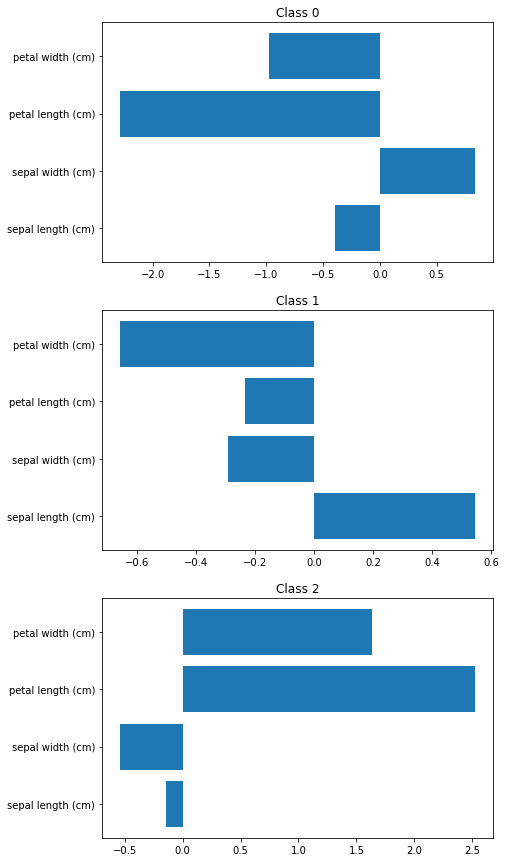

In [32]:
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title('Class {}'.format(i))

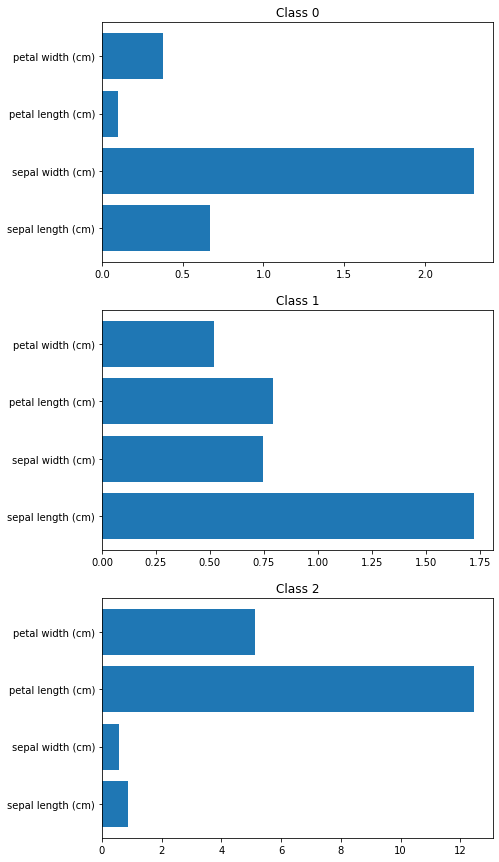

In [33]:
# オッズ比を確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title('Class {}'.format(i))

In [34]:
print('重み（係数）:', log_reg.coef_[0])
print('オッズ比:', np.exp(log_reg.coef_[0]))

重み（係数）: [-0.39765327  0.8342231  -2.28943702 -0.97842682]
オッズ比: [0.67189495 2.30302414 0.10132349 0.37590199]


In [35]:
log_reg.predict([x_test[0]])

array([2])

In [36]:
log_reg.predict_proba([x_test[0]])

array([[1.31706500e-04, 5.98487863e-02, 9.40019507e-01]])

#### ランダムフォレスト

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=0)
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 0.9523809523809523
test score: 0.9555555555555556


In [40]:
model.feature_importances_

array([0.18666585, 0.        , 0.32209545, 0.4912387 ])

<BarContainer object of 4 artists>

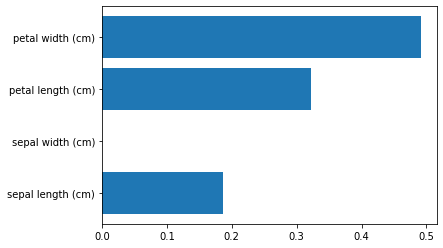

In [41]:
y = feature_names
width = model.feature_importances_

plt.barh(y=y, width=width)

#### XGBoost

In [42]:
from xgboost import XGBClassifier

In [43]:
model = XGBClassifier()
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 1.0
test score: 0.9777777777777777
